### Lotka Volterra - numerical root finding

In [194]:
import numpy as np
import matplotlib.pyplot as plt

##### Variables

In [195]:
alpha = 100 # reproduction rate rabbits
beta = 4 # kill rate foxes -> rabbits
gamma = 20 # mortality rate foxes
delta = 0.01 # reproduction rate foxes

#### Functions

In [196]:
def lotka_volterra_system(x, alpha, beta, gamma, delta):
    R, F = x
    return np.array([alpha * R - beta * R * F, -gamma * F + delta * R * F])

In [197]:
def jacobian(x, alpha, beta, gamma, delta):
    R, F = x
    return np.array([[alpha - beta * F, -beta * R], [delta * F, -gamma + delta * R]])

#### Recursive Root finding

In [198]:
def newton_raphson(x, tol, alpha, beta, gamma, delta, log=[]):
    fx = lotka_volterra_system(x, alpha, beta, gamma, delta)
    J = jacobian(x, alpha, beta, gamma, delta)
    J_inv = np.linalg.inv(J)
    x_next = x - J_inv @ fx
    log.append(x_next)

    if np.linalg.norm(x_next - x) < tol:
        return x_next, log
    else:
        return newton_raphson(x_next, tol, alpha, beta, gamma, delta, log)

#### Output

##### Approximation

In [199]:
x = np.array([1000, 100])
tol = 0.1
(R, F), log = newton_raphson(x, tol, alpha, beta, gamma, delta)

print("Approximated rabbit population: ", R)
print("Approximated fox population: ", F)

Approximated rabbit population:  2000.0
Approximated fox population:  25.000000000000004


#### Convergence

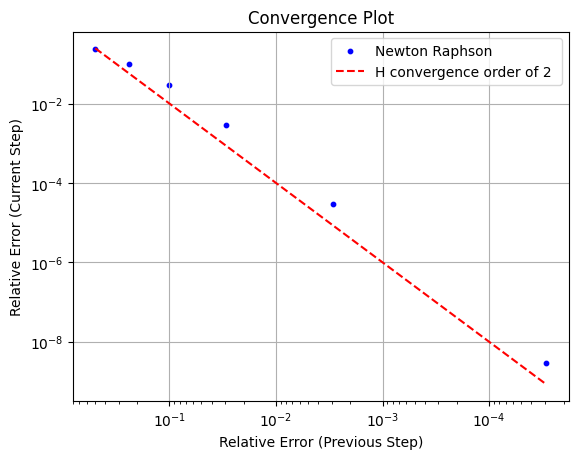

In [201]:
log = np.array(log)[:8]
relative_errors = [np.linalg.norm(x)/np.linalg.norm(log[:-1]) for x in log[1:] - log[:-1]]

plt.scatter(relative_errors[:-1], relative_errors[1:], color='blue', marker='o', s=10, label = "Newton Raphson")
plt.plot(relative_errors[:-1], [x**2 for x in relative_errors[:-1]], "r--", label = "H convergence order of 2 ")
plt.xlabel('Relative Error (Previous Step)')
plt.xscale("log")
plt.xlim(plt.xlim()[::-1])
plt.ylabel('Relative Error (Current Step)')
plt.yscale("log")
plt.title('Convergence Plot')
plt.legend()
plt.grid()
plt.show()

##### Closed form solution

In [200]:
print("Rabbit population: ", gamma/delta)
print("Fox population: ", alpha/beta)

Rabbit population:  2000.0
Fox population:  25.0


### Visualization

[0 0]
[  25 2000]


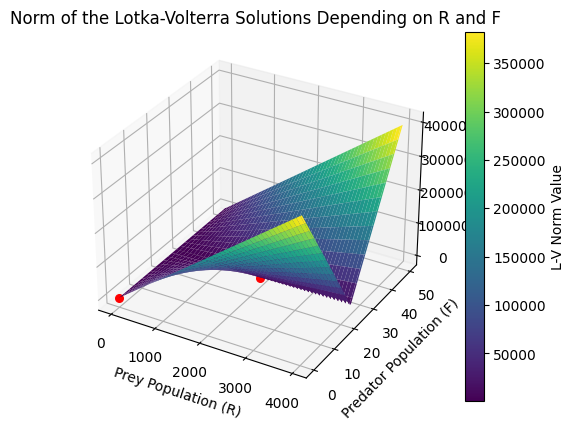

In [202]:
# Set up of grid space
R_range = np.linspace(0, 4000, 4000 + 1)
F_range = np.linspace(0, 50, 50 + 1)
R_grid, F_grid = np.meshgrid(R_range, F_range)


# Compute the Lotka Volterra solution and its norm
fx_grid = np.array([np.linalg.norm(lotka_volterra_system((R, F), alpha, beta, gamma, delta)) for R, F in zip(np.ravel(R_grid), np.ravel(F_grid))])
fx_grid = fx_grid.reshape(R_grid.shape)

roots = np.array(np.where(fx_grid == 0)).T


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(R_grid, F_grid, fx_grid, cmap='viridis', edgecolor='none')
for root in roots:
    print(root)
    ax.scatter(root[1], root[0], 0, color='red', marker='o', s=30, label="Steady State")

# Customize the plot
ax.set_title("Norm of the Lotka-Volterra Solutions Depending on R and F")
ax.set_xlabel("Prey Population (R)")
ax.set_ylabel("Predator Population (F)")
ax.set_zlabel("Lotka-Volterra Norm")
fig.colorbar(surf, ax=ax, label="L-V Norm Value")

# Show the plot
plt.show()

### Supplementary

#### Fox dynamics

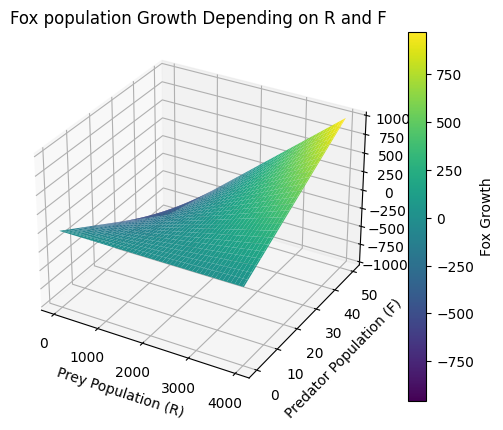

In [203]:
# Set up of grid space
R_range = np.linspace(0, 4000, 4000 + 1)
F_range = np.linspace(0, 50, 50 + 1)
R_grid, F_grid = np.meshgrid(R_range, F_range)


# Compute the Lotka Volterra solution and its norm
fx_grid = np.array([lotka_volterra_system((R, F), alpha, beta, gamma, delta)[1] for R, F in zip(np.ravel(R_grid), np.ravel(F_grid))])
fx_grid = fx_grid.reshape(R_grid.shape)


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(R_grid, F_grid, fx_grid, cmap='viridis', edgecolor='none')

# Customize the plot
ax.set_title("Fox population Growth Depending on R and F")
ax.set_xlabel("Prey Population (R)")
ax.set_ylabel("Predator Population (F)")
ax.set_zlabel("Fox Popuation Growth")
fig.colorbar(surf, ax=ax, label="Fox Growth")

# Show the plot
plt.show()

#### Rabbit dynamics

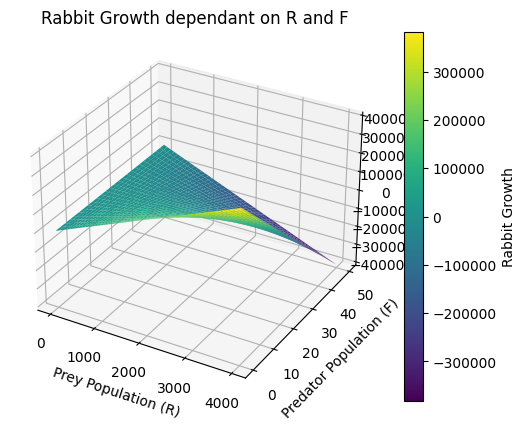

In [204]:
# Set up of grid space
R_range = np.linspace(0, 4000, 4000 + 1)
F_range = np.linspace(0, 50, 50 + 1)
R_grid, F_grid = np.meshgrid(R_range, F_range)


# Compute the Lotka Volterra solution and its norm
fx_grid = np.array([lotka_volterra_system((R, F), alpha, beta, gamma, delta)[0] for R, F in zip(np.ravel(R_grid), np.ravel(F_grid))])
fx_grid = fx_grid.reshape(R_grid.shape)


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(R_grid, F_grid, fx_grid, cmap='viridis', edgecolor='none')

# Customize the plot
ax.set_title("Rabbit Growth dependant on R and F")
ax.set_xlabel("Prey Population (R)")
ax.set_ylabel("Predator Population (F)")
ax.set_zlabel("Rabbit population Growth")
fig.colorbar(surf, ax=ax, label="Rabbit Growth")

# Show the plot
plt.show()